In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7754161139786601359
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7017170208
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8397060132577862651
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, KFold
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.datasets import make_multilabel_classification


from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, BatchNormalization, Activation,InputLayer,TimeDistributed
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras import metrics
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.regularizers import l2

import pickle

import matplotlib.pyplot as plt
from collections import Counter

In [3]:
from __future__ import print_function
import pandas as pd

In [47]:
loss = []

In [4]:
with open('SmotedWindow/X_wfo.pickle', 'rb') as f:
    X = pickle.load(f)

In [5]:
with open('SmotedWindow/y_wfo.pickle', 'rb') as f:
    y = pickle.load(f)

In [6]:
X = X.reshape((*X.shape, 1))

In [7]:
y = to_categorical(y)

In [26]:
import os
from collections import Counter

X_dataset = pd.read_csv('SmotedWindow2/X.csv')
y_dataset = pd.read_csv('SmotedWindow2/y.csv')

In [27]:
x_val = X_dataset.to_numpy().reshape(X_dataset.to_numpy().shape[0],6,1)
y_val = y_dataset.to_numpy()
y_val_c = to_categorical(y_val)

In [190]:
int(len(y_val_c)/4)

20963

In [191]:
x_val.shape

(83853, 6, 1)

In [192]:
len(y_val_c[int(len(y_val_c)/4*3):])

20964

In [8]:
#X_train, X_test, y_train, y_test = x_val[:int(len(y_val_c)/4*3)], x_val[int(len(y_val_c)/4*3):], y_val_c[:int(len(y_val_c)/4*3)], y_val_c[int(len(y_val_c)/4*3):]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) 

In [8]:
X.shape

(1281725, 184, 1)

In [9]:
k = 4
m = X_train.shape[0]
k * m / ((k - 1) * np.linalg.norm(X_train))
lipchitzLR

16.25717183686824

In [38]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(128))

model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(BatchNormalization())

model_LSTM.add(Dense(4))
model_LSTM.add(Activation('softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=SGD(lr=1.), metrics=['categorical_accuracy'])
#print(model_LSTM.summary())

In [59]:
model_LSTM.optimizer = SGD(0.01)

In [60]:
X_train.shape, y_train.shape

((1025380, 184, 1), (1025380, 4))

In [61]:
history = model_LSTM.fit(X_train, y_train, epochs =10, batch_size=256)

Epoch 1/5
4006/4006 [==============================] - 74s 18ms/step - loss: 0.1055 - categorical_accuracy: 0.9636
Epoch 2/5
 835/4006 [=====>........................] - ETA: 58s - loss: 0.6207 - categorical_accuracy: 0.7799

KeyboardInterrupt: 

* 10 epochs (1.0): `loss: 0.1622 - categorical_accuracy: 0.9474`
* 20 epochs (0.3): `loss: 0.0976 - categorical_accuracy: 0.9677`

In [51]:
results = model_LSTM.evaluate(X_test, y_test)
print("test loss, acc, test acc:", results)

8011/8011 [==============================] - 44s 5ms/step - loss: 0.0976 - categorical_accuracy: 0.9677
test loss, acc, test acc: [0.09756986796855927, 0.9677426815032959]


In [52]:
prediction = model_LSTM.predict(X_test)

In [53]:
pred = np.argmax(prediction, axis=-1)
original_y = np.argmax(y_test,axis=-1)

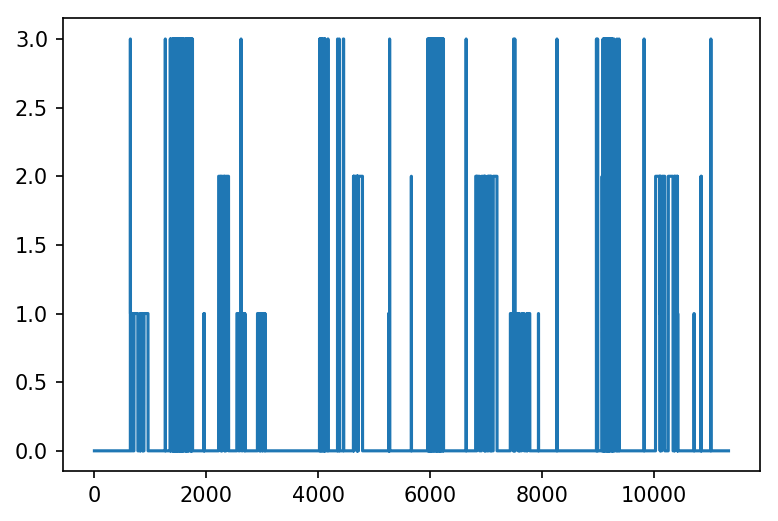

In [63]:
plt.figure(dpi=150)
plt.plot(pred);

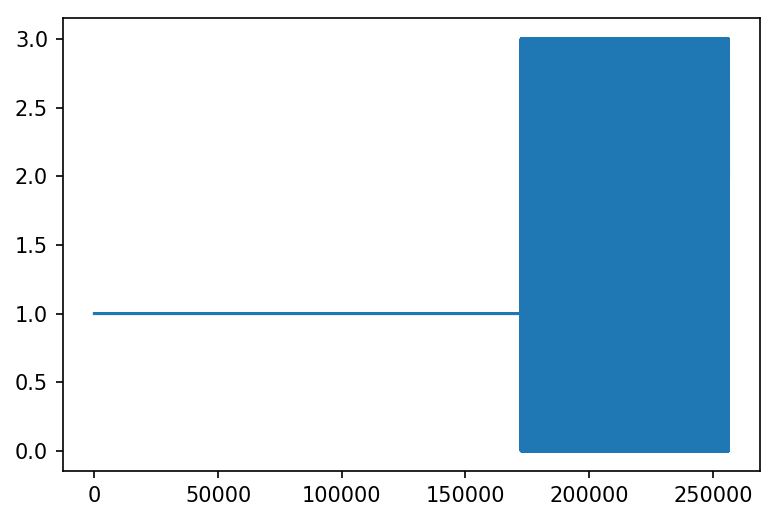

In [64]:
plt.figure(dpi=150)
plt.plot(original_y);

In [56]:
alltfiles = os.listdir('FinalTestDataWindow/')
for file in alltfiles:
    X_dataset = pd.read_csv('FinalTestDataWindow/'+file)
    filename = file.split('_time')
    print(filename)
    print(X_dataset.shape)
    #x_val = X_dataset.to_numpy().reshape(X_dataset.to_numpy().shape[0],int(X_dataset.to_numpy().shape[1]/6),6)
    #x_val = X_dataset.to_numpy().reshape(X_dataset.to_numpy().shape[0],6,1)
    x_val = X_dataset.to_numpy().reshape((*X_dataset.shape,1))
    prediction = model_LSTM.predict(x_val)
    pred = np.argmax(prediction, axis=-1)
    with open('TestPredictions/'+filename[0]+'_prediction'+filename[1],'w') as csv:
        for y in pred:
            csv.write(str(int(y)))
            csv.write('\n')


['subject_009_01__y', '.csv']
(9498, 186)
['subject_010_01__y', '.csv']
(12270, 186)
['subject_011_01__y', '.csv']
(12940, 186)
['subject_012_01__y', '.csv']
(11330, 186)


In [57]:
loss.extend(history.history['loss'])

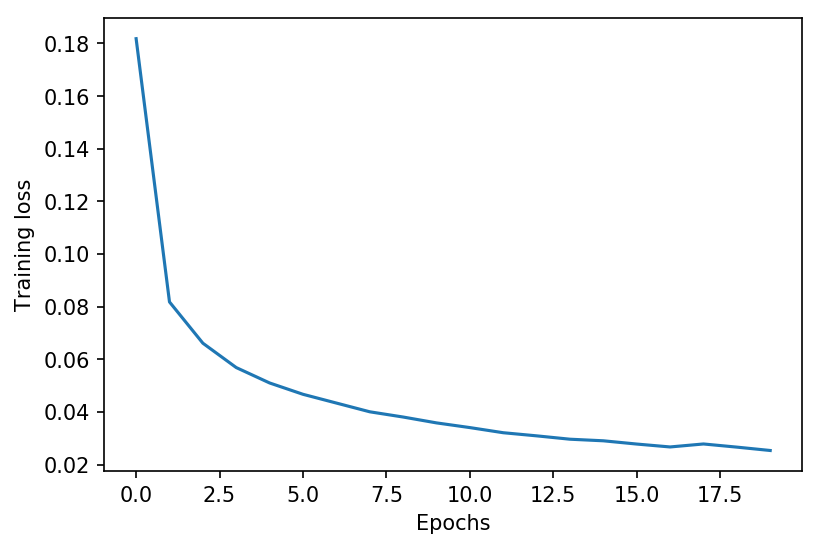

In [65]:
plt.figure(dpi=150)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.plot(range(len(loss)),loss);